# Linear Regression using Gradient Descent

In [2]:
# importing the libraries required for calculating the gradient descent algorithm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

## Loading the dataset from the github profile which was made public.
    Preprocessing the dataset before training into the model

In [3]:
url = "https://raw.githubusercontent.com/YaswanthAdari/Gradient_descent_/main/Folds5x2_pp.csv"
data = pd.read_csv(url)
data.head(5)
data.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Removing the NA values in the dataset 

In [4]:
data = data.dropna()

## Removing the duplicates in the dataset using drop_duplicates() 

In [5]:
data = data.drop_duplicates()

## Building a correlation matrix using corr() method and checking the correlation of features['AT', 'V', 'AP', 'RH'] with the output variable['PE']



In [6]:
corr = data.corr()
correlation_outcome = corr['PE'].abs().sort_values(ascending=False)
print(correlation_outcome)
data.corr()

PE    1.000000
AT    0.947908
V     0.869900
AP    0.518687
RH    0.391175
Name: PE, dtype: float64


,AT,V,AP,RH,PE
AT,1.000000,0.843689,-0.508222,-0.543947,-0.947908
V,0.843689,1.000000,-0.415718,-0.312214,-0.869900
AP,-0.508222,-0.415718,1.000000,0.101631,0.518687
RH,-0.543947,-0.312214,0.101631,1.000000,0.391175
PE,-0.947908,-0.869900,0.518687,0.391175,1.000000


## Plotting the correlation matrix to check which features among these are correlated to the target variable(output variable)

Based on the correlation matrix, the least correlated feature with the target variable (PE) seems to be 'AP' (Ambient Pressure). The correlation coefficient between 'AP' and 'PE' is 0.518687.

The correlation values range from -1 to 1, where values close to -1 indicate a strong negative correlation, values close to 1 indicate a strong positive correlation, and values close to 0 indicate a weak or no correlation. In this case, the correlation coefficient of 0.518687 suggests a moderate positive correlation between 'AP' and 'PE', but it is relatively lower compared to the other features in the matrix. Hence, we are not removing any features

<AxesSubplot: >

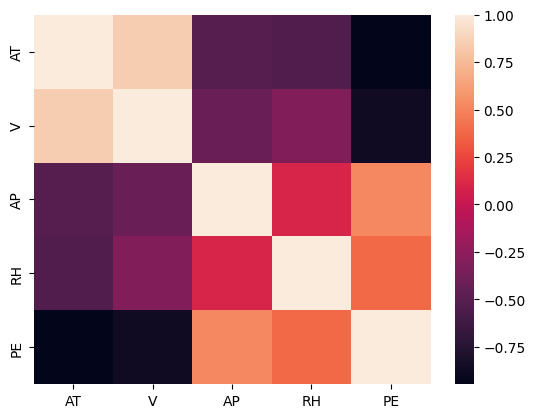

In [7]:

import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Spliting the dataframe into x, y vectors consisting of features and target variable respectively

In [8]:
x = data.iloc[0:, 0:4].values
y = data.iloc[0:, 4:].values


## checking whether the features are establishing a linear relationship with the target variable.

Hence we are plotting each feature(X-axis) against target variable(Y-axis) and the outcome suggests that it really do establish a linear relationship  

$$
h(\theta)x = \theta_0 + \theta_1(x)
$$




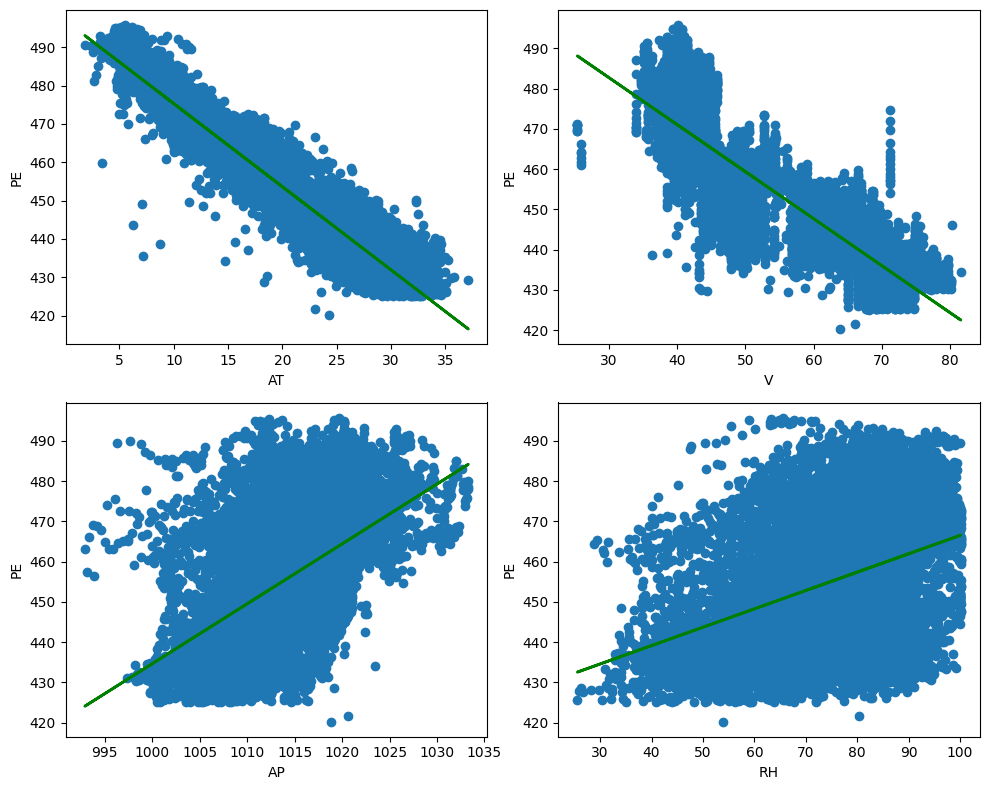

In [9]:


variables = ['AT', 'V', 'AP', 'RH']  # List of variable names
target = 'PE'  # Target variable name

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots

for i, var in enumerate(variables):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index

    axs[row, col].scatter(data[var], data[target])  # Plot the variable against the target
    axs[row, col].set_xlabel(var)  # Set the x-axis label
    axs[row, col].set_ylabel(target)  # Set the y-axis label

    # Plot the linear regression line
    m, c = np.polyfit(data[var], data[target], 1)  # Perform linear regression
    axs[row, col].plot(data[var], m * data[var] + c, color='green', linewidth=2)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()




## Spliting the dataset into train and test data(80, 20) split using train_test_split function from sklearn

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

## printing the shape of X_train, X_test, Y_train, Y_test using train_test_split function from sklearn.model_selection

this size of the training and testing data set is checked to see whether we have same dimension for both the train,test data

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7621, 4)
(1906, 4)
(7621, 1)
(1906, 1)


## Standarizing the dataset for better accuracy 

$$
StandardDeviation = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{x})^2}
$$

The version which I have implemented is: 
$$
Y_{\text{{test\_standardized}}} = \frac{{Y_{\text{{test}}} - \bar{Y_{\text{{test}}}}}}{{\text{{std}}(Y_{\text{{test}}})}}
$$

In [12]:
X_train_standardized = (X_train - X_train.mean()) / X_train.std()
X_test_standardized = (X_test - X_train.mean()) / X_train.std()
Y_train_standardized = (Y_train - Y_train.mean()) / Y_train.std()
Y_test_standardized = (Y_test - Y_test.mean()) / Y_test.std()

## Implementing gradient descent from scratch

Our aim can be stated as: Choose parameters θ0 and θ1( such that our hypothesis h(θ) x is as close to y for our training examples.

So this the error function(MSE) and our aim is to reduce this function by choosing the weights updating based calculating the gradients
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(\theta)(x^{(i)}) - y^{(i)})^2
$$

Calculating the gradient descent:
The gradient descent algorithm can be summarized as follows:

1. Initialize the weights θ with random or predefined values.
2. Set the learning rate Α to control the step size for weight updates.
3. Repeat until convergence:
   - Calculate the predicted values ℎ𝜃(𝑥) using the current weights θ.
   - Calculate the error or cost function 𝐽(𝜃) to measure the difference between the predicted values and the actual values.
   - Update the weights θ using the gradient of the cost function:
     𝜃:=𝜃−𝛼⋅∇𝐽(𝜃) where ∇𝐽(𝜃) is the gradient vector of the cost function with respect to the weights.
4. Return the final weights θ that minimize the cost function.

In each iteration, the weights θ are updated by subtracting the product of the learning rate \(\alpha\) and the gradient vector ∇𝐽(𝜃). The gradient vector points in the direction of steepest ascent, so subtracting it from the weights moves them in the direction of steepest descent, gradually minimizing the cost function.

This process is repeated iteratively until convergence, where the algorithm aims to find the optimal values of the weights θ that minimize the cost function and provide the best fit to the data.

$$
\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}
$$



In [13]:
import logging

# Configure logging
logging.basicConfig(filename='linear_regression.log', level=logging.INFO,
                    format='%(asctime)s - %(message)s')

def error_function(y_actual,y_predicted):
    error = 0
    m = len(y_actual)
    for i in range(0,m):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*m)

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    m = len(y_actual)
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] -= (y_actual[j] - y_pred[j])* x[j][i]
    return grad/m


def weights(x_train,y_train,num_samples, num_features, num_iterations,learning_rate):
    new_x_train = np.ones((num_samples,num_features+1))
    new_x_train[:,0:num_features] = x_train
    w = np.zeros(num_features)
    w =np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        logging.info(f"Iteration {i}: MSE = {error}, Learning rate = {learning_rate}, Number")
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate * grad
        learning_rate = learning_rate/1.05                               # Learning rate Decay 
    return w

def regression_test(x_test,w, num_samples_test, num_features_test):
    new_x_test = np.ones((num_samples_test,num_features_test+1))
    new_x_test[:,0:num_features_test] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)


## We have created a MSE_points array to store all the error values and also a log value is created using logging and all the information regarding number of iterations, learning rate and MSE error are stored there

In [21]:
MSE_points = []
num_iterations = 300
learning_rate = 0.01
num_samples = X_train.shape[0]
num_features = X_train.shape[1]
num_samples_test = X_test.shape[0]
num_features_test = X_test.shape[1]
w = weights(X_train_standardized,Y_train,num_samples, num_features,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w, num_samples_test, num_features_test)
error_function(Y_test,Y_pred)
MSE_points[-1]

mean square error:  [12.30876916] after 0 th iteration
mean square error:  [9.89798783] after 1 th iteration
mean square error:  [8.04047804] after 2 th iteration
mean square error:  [6.5945585] after 3 th iteration
mean square error:  [5.45807584] after 4 th iteration
mean square error:  [4.55657272] after 5 th iteration
mean square error:  [3.83521514] after 6 th iteration
mean square error:  [3.2532213] after 7 th iteration
mean square error:  [2.77997467] after 8 th iteration
mean square error:  [2.39228372] after 9 th iteration
mean square error:  [2.07243076] after 10 th iteration
mean square error:  [1.8067693] after 11 th iteration
mean square error:  [1.58470647] after 12 th iteration
mean square error:  [1.39795845] after 13 th iteration
mean square error:  [1.24000092] after 14 th iteration
mean square error:  [1.10566032] after 15 th iteration
mean square error:  [0.99080741] after 16 th iteration
mean square error:  [0.89212593] after 17 th iteration
mean square error:  [0

array([0.09263665])

## Plotting the MSE points on using seaborn to evaluate the results, as we can see after a point the error function became constant.


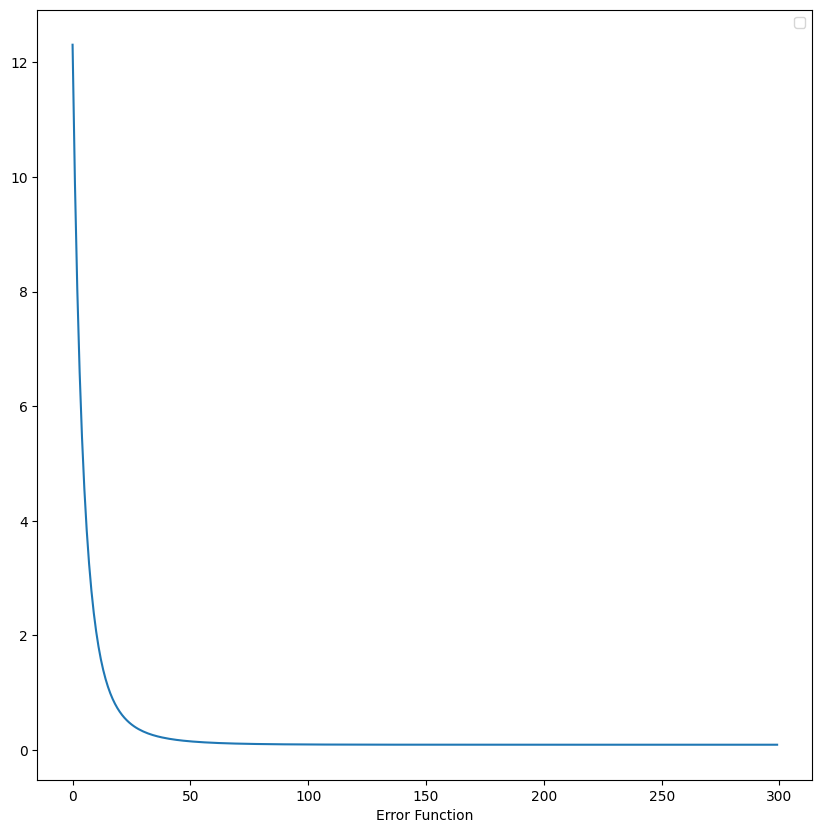

In [29]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.plot(range(0,300), MSE_points)
plt.xlabel('Error Function')
plt.legend()
plt.show()


## Comparing the actual and predicted values to check the accuracy

In [23]:
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),  # Convert to 1-dimensional array
    'Predicted Values': Y_pred.ravel()  # Convert to 1-dimensional array
})

pred_df.head()

,Actual Value,Predicted Values
0,440.85,398.347889
1,430.70,400.695564
2,436.36,400.136167
3,450.32,401.342575
4,443.13,402.396396


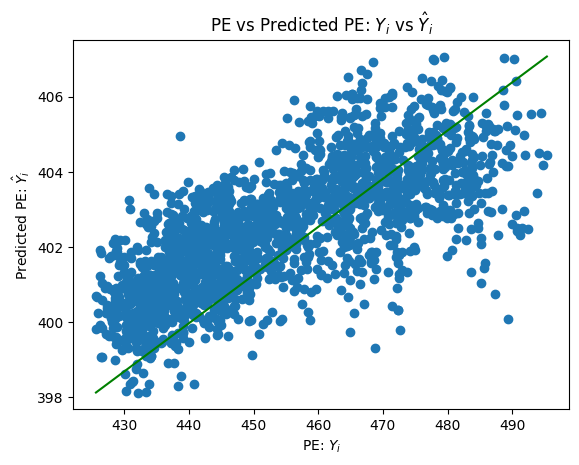

In [24]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(Y_test, Y_pred)

# Green line indicating linear relationship
plt.plot([min(Y_test), max(Y_test)], [min(Y_pred), max(Y_pred)], color='green')

plt.xlabel("PE: $Y_i$")
plt.ylabel("Predicted PE: $\hat{Y}_i$")
plt.title("PE vs Predicted PE: $Y_i$ vs $\hat{Y}_i$")
plt.show()